# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [3]:
#read in csvs
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")

In [4]:
#display head of heroes_df
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
#display head of powers_df
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [6]:
heroes_df.drop("Unnamed: 0", axis = 1, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
#print info for heroes_df
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [8]:
#print desc stats for heroes_df
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [9]:
#print info for powers
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
#describe powers
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Peek-a-Boo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [11]:
#how many columns in powers?
len(powers_df.columns)

168

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

First, I will check the columns of each dataframe to discover which columns have nulls and how many. 

For numericals with nulls, I will check the percentage of rows with nulls. If high, I will remove that column. If low, I will look at the descriptive stats for that column and decide whether to impute the mean or median or remove the null rows.

For categoricals, I will count how many of each category are in the dataset. If low amount of nulls, I could either remove the rows or I could keep the nulls as a separate category understanding this could introduce noise into the data. It really depends on what the column is conveying. If there are lots of nulls, I'd probably drop the column.



What columns in each df have null values?

In [12]:
#null count for heroes
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [13]:
#null count for powers - since there are 168 columns and are boolean
#check each column for nulls and add to list if it has nulls

null_cols = []
for col in powers_df.columns:
    if powers_df[col].isna().sum() == 0:
        continue
    else:
        null_cols.append(col)

null_cols

[]

Only `heroes_df` has nulls, so we'll focus there

In [14]:
#pct of rows that are null
heroes_df.Weight.isna().sum()/len(heroes_df.Weight)*100

0.2724795640326975

Only 0.2% of rows are missing weight, so drop it

In [15]:
#drop null rows in weight
heroes_df.dropna(axis=0, subset=['Weight'], inplace = True)

In [16]:
#check they dropped
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     13
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [17]:
#get unique values for Publisher
heroes_df.Publisher.value_counts(dropna=False)

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
NaN                   13
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Icon Comics            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Titan Books            1
Rebellion              1
Universal Studios      1
Microsoft              1
Hanna-Barbera          1
J. K. Rowling          1
J. R. R. Tolkien       1
South Park             1
Name: Publisher, dtype: int64

Look at rows with NaN publisher

In [18]:
#get 13 rows with publisher = nan
heroes_df[heroes_df.Publisher.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


I'm going to keep these NaNs as a separate category

In [19]:
#replace NaN with 'missing'
heroes_df.Publisher.fillna('missing', inplace = True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [20]:
#check why some rows have height and weight = -99
heroes_df.describe()

,Height,Weight
count,732.000000,732.000000
mean,102.344262,43.855191
std,139.790036,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [21]:
#how many rows have height or weight = -99
len(heroes_df[(heroes_df['Weight']==-99) | (heroes_df['Height']==-99)])

242

In [22]:
#how many individually?
print(f'Rows with weight = 99: {len(heroes_df[(heroes_df["Weight"]==-99)])}')
print(f'Pct of rows with weight = 99: {len(heroes_df[(heroes_df["Weight"]==-99)])/len(heroes_df.Weight)}\n')
print(f'Rows with height = 99: {len(heroes_df[(heroes_df["Height"]==-99)])}')
print(f'Pct of rows with height = 99: {len(heroes_df[(heroes_df["Height"]==-99)])/len(heroes_df.Height)}\n')

Rows with weight = 99: 237
Pct of rows with weight = 99: 0.3237704918032787

Rows with height = 99: 217
Pct of rows with height = 99: 0.296448087431694



I'm going to impute the median (need to use these later in the project)
Create dfs without -99 values to get medians

In [23]:
height_no_placeholder = heroes_df[heroes_df['Height']!=-99].Height
weight_no_placeholder = heroes_df[heroes_df['Weight']!=-99].Weight

In [24]:
#impute height and weight with median
heroes_df['Height'] = heroes_df['Height'].map(lambda x: height_no_placeholder.median() if x==-99 else x)
heroes_df['Weight'] = heroes_df['Weight'].map(lambda x: weight_no_placeholder.median() if x==-99 else x)

In [25]:
#check
heroes_df.describe()

,Height,Weight
count,732.000000,732.000000
mean,185.942623,102.133880
std,49.394766,86.860273
min,15.200000,2.000000
25%,178.000000,74.000000
50%,183.000000,81.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [26]:
#let's now run through the rest of the variables to check any weird values
for col in heroes_df.columns:
    print(f'{col}: \n {heroes_df[col].value_counts()}\n')

name: 
 Goliath              3
Spider-Man           3
Batman               2
Atlas                2
Namor                2
Blue Beetle          2
Toxin                2
Batgirl              2
Black Canary         2
Speedy               2
Atom                 2
Blizzard             2
Vindicator           2
Captain Marvel       2
Nova                 2
Firestorm            2
Angel                2
Bloodaxe             1
Bumblebee            1
Punisher             1
Angel Salvadore      1
Cyborg Superman      1
Static               1
Marvel Girl          1
Destroyer            1
Arsenal              1
Jim Powell           1
Spider-Gwen          1
Buffy                1
Scarlet Spider II    1
                    ..
Faora                1
Predator             1
Binary               1
Guardian             1
Sinestro             1
Ant-Man              1
Mockingbird          1
Kilowog              1
Clea                 1
Sif                  1
Wonder Woman         1
Bushido              1
Dea

There are a number of columns using something else as a placeholder after scanning unique values

In [27]:
#list columns to check that have '-' entry
cols = ['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color', 'Alignment']

In [28]:
#iterate over each col to get num and pct of rows == '-'
for col in cols:
    print(col)
    print(f'Pct: {len(heroes_df[heroes_df[col]=="-"])/len(heroes_df[col])}')
    print(f'Num rows: {len(heroes_df[heroes_df[col]=="-"])}\n')

Gender
Pct: 0.03825136612021858
Num rows: 28

Eye color
Pct: 0.2336065573770492
Num rows: 171

Race
Pct: 0.41530054644808745
Num rows: 304

Hair color
Pct: 0.2336065573770492
Num rows: 171

Skin color
Pct: 0.9030054644808743
Num rows: 661

Alignment
Pct: 0.009562841530054645
Num rows: 7



For **eye color**, **race**, **hair color**, and **skin color**, there are too many missing values to throw out the rows, but getting rid of these gets rid of most of our data, so keep the nulls as a separate category. For **gender**, it's plausible that a hero doesn't fit in to a binary gender, so keep nulls here too. Null **Alignments** only make up 7 rows, so I will drop those rows.

In [29]:
#change "-" to "missing" for eye color, hair color, skin color, gender and race
cols_to_missing = ['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color']
for col in cols_to_missing:
    heroes_df[col] = heroes_df[col].map(lambda x: "missing" if x=="-" else x)

In [30]:
#drop rows = '-'' in Alignment
heroes_df = heroes_df[heroes_df['Alignment']!="-"]

In [31]:
#iterate over each col again to check
for col in cols:
    print(col)
    print(f'Pct: {len(heroes_df[heroes_df[col]=="-"])/len(heroes_df[col])}')
    print(f'Num rows: {len(heroes_df[heroes_df[col]=="-"])}\n')

Gender
Pct: 0.0
Num rows: 0

Eye color
Pct: 0.0
Num rows: 0

Race
Pct: 0.0
Num rows: 0

Hair color
Pct: 0.0
Num rows: 0

Skin color
Pct: 0.0
Num rows: 0

Alignment
Pct: 0.0
Num rows: 0



In [32]:
#check head 
heroes_df.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,missing,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,missing,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,missing,bad,81.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,missing,bad,122.0
6,Adam Monroe,Male,blue,missing,Blond,183.0,NBC - Heroes,missing,good,81.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,missing,good,88.0
8,Agent 13,Female,blue,missing,Blond,173.0,Marvel Comics,missing,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,missing,good,81.0


In [33]:
#check tail
heroes_df.tail()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,missing,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,missing,good,57.0
733,Zoom,Male,red,missing,Brown,185.0,DC Comics,missing,bad,81.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [34]:
#set up names column in each as the index to join on
powers_df.set_index("hero_names", inplace = True)
heroes_df.set_index("name", inplace = True)

In [35]:
#left join dfs
heroes_and_powers = heroes_df.join(powers_df)
heroes_and_powers.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,missing,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,missing,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,missing,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#store list of characters with null powers
power_cols = heroes_and_powers.iloc[:,9:]
null_powers = list(power_cols[power_cols.isna().all(axis = 1)].index)

In [37]:
#remove characters with null powers - they didn't have a power in the powers_df
heroes_and_powers = heroes_and_powers[~heroes_and_powers.index.isin(null_powers)]

In [38]:
#confirm there are missing elements
heroes_and_powers.isna().sum()

Gender                   0
Eye color                0
Race                     0
Hair color               0
Height                   0
Publisher                0
Skin color               0
Alignment                0
Weight                   0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [39]:
#create subset dfs for male and female
male_heroes = heroes_and_powers[heroes_and_powers['Gender']=='Male']
female_heroes = heroes_and_powers[heroes_and_powers['Gender']=='Female']

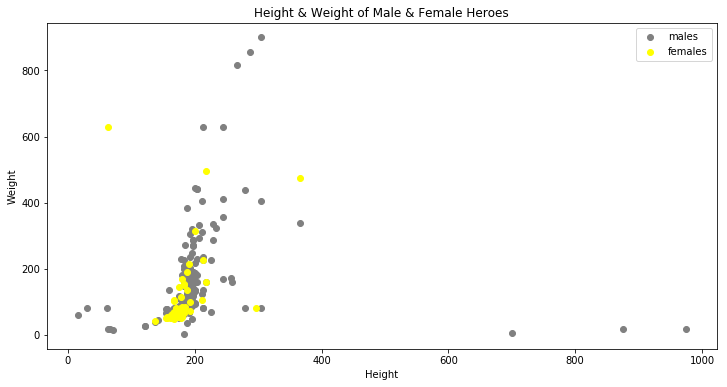

In [40]:
#create scatterplot. one figure with two axes
fig = plt.figure(figsize=(12,6))
plt.scatter(male_heroes.Height, male_heroes.Weight, c='grey', label='males')
plt.scatter(female_heroes.Height, female_heroes.Weight, c='yellow', label='females')
plt.title("Height & Weight of Male & Female Heroes")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [41]:
#slice into separate dataframes by gender
#already done above with male_heroes and female_heroes

In [42]:
#function accepts a df, filters on given gender, returns distplot of given column
def show_distplot(dataframe, gender, column_name):
    filtered_df = dataframe[dataframe['Gender']==gender]
    x = filtered_df[column_name]
    ax = sns.distplot(x, kde=False)
    ax.set(title=f'Distribution of {column_name} for {gender}s', xlabel=f'{column_name}', ylabel='frequency')
    return ax

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


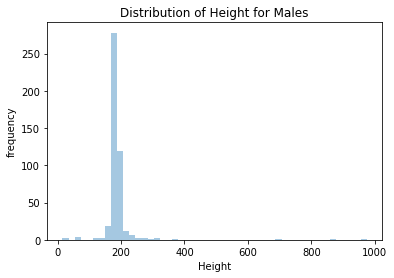

In [43]:
# Male Height
show_distplot(heroes_and_powers, "Male", "Height")

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


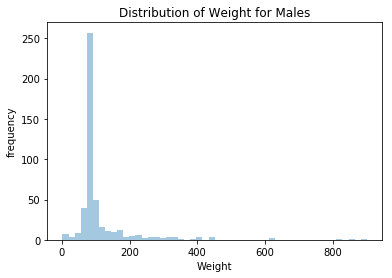

In [44]:
# Male Weight
show_distplot(heroes_and_powers, "Male", "Weight")

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


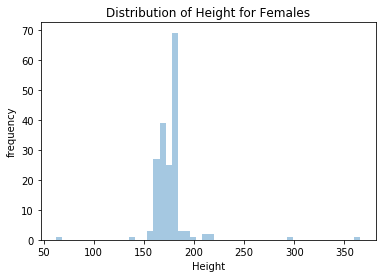

In [45]:
# Female Height
show_distplot(heroes_and_powers, "Female", "Height")

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


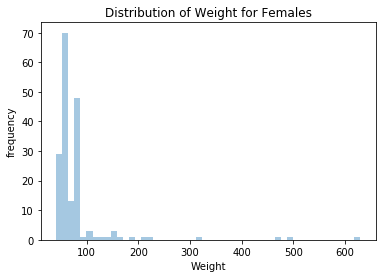

In [46]:
# Female Weight
show_distplot(heroes_and_powers, "Female", "Weight")

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

All plots are showing signs of large dispersion but a tight center with a tall peak (high kurtosis). There are some outliers throwing each of them off. The means of all are higher than the median as they are all skewed to the left by the high outliers. The mode is the imputed value of the median that we gave the missing values. 

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [47]:
#5 most common powers overall
power_cols.sum().sort_values(ascending = False).head()

Super Strength    355.0
Stamina           289.0
Durability        257.0
Super Speed       248.0
Agility           240.0
dtype: float64

In [48]:
#5 most common powers in marvel
marvel_heroes = heroes_and_powers[heroes_and_powers['Publisher']=='Marvel Comics'].index
power_cols.loc[marvel_heroes].sum().sort_values(ascending = False).head()

Super Strength    216.0
Durability        168.0
Stamina           163.0
Super Speed       151.0
Agility           139.0
dtype: float64

In [49]:
#5 most common powers in dc
dc_heroes = heroes_and_powers[heroes_and_powers['Publisher']=='DC Comics'].index
power_cols.loc[dc_heroes].sum().sort_values(ascending = False).head()

Super Strength    119.0
Stamina           102.0
Flight             90.0
Super Speed        85.0
Durability         77.0
dtype: float64

In [50]:
#Top 5 powers for women in marvel
marvel_females = heroes_and_powers[(heroes_and_powers['Publisher']=='Marvel Comics') & (heroes_and_powers['Gender']=='Female')].index
power_cols.loc[marvel_females].sum().sort_values(ascending = False).head()

Super Strength    55.0
Agility           40.0
Durability        39.0
Super Speed       38.0
Stamina           38.0
dtype: float64

In [51]:
#top 5 powers for women in dc
dc_females = heroes_and_powers[(heroes_and_powers['Publisher']=='DC Comics') & (heroes_and_powers['Gender']=='Female')].index
power_cols.loc[dc_females].sum().sort_values(ascending = False).head()

Stamina           32.0
Super Strength    28.0
Reflexes          24.0
Stealth           23.0
Agility           22.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

In the DC heroes top 5 is Flight instead of Marvel's Agility, otherwise they are similar in contents but a bit different in order. marvel is most similar to the overall trend (same top 5, different order)

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [52]:
#Which powers have the highest chance of co-occuring in a hero 
#(e.g. super strength and flight), and does this differ by gender?

def top_power_combos(gender):
    #function regardless of gender
    if gender == 'all':
        #get the power names
        powers = power_cols.columns
        #init a dict to hold power combos and rates of co_occurrence
        powers_co_occur_dict = {}
        #iterate over powers once
        for power_1 in powers:
            #iterate againe to combine powers
            for power_2 in powers:
                #pass over powers when they are the same
                if power_1 == power_2:
                    pass
                #pass over power combo if it occurs
                elif f'{power_1} : {power_2}' in powers_co_occur_dict:
                    pass
                #pass over power combo if it occurs in reverse
                elif f'{power_2} : {power_1}' in powers_co_occur_dict:
                    pass
                #get rate and assign to dictionary
                else:
                    #num rows where both powers are True
                    val = len(heroes_and_powers[(heroes_and_powers[power_1]==True) & (heroes_and_powers[power_2]==True)])
                    #assign power combo as key and rate as value
                    powers_co_occur_dict[f'{power_1} : {power_2}'] = val
        #convert dict to dataframe for easier use
        powers_co_occur = pd.DataFrame.from_dict(powers_co_occur_dict, orient='index', columns=['rate of co-occurence'])
        #sort by descending rate of occurrence
        powers_co_occur.sort_values(by='rate of co-occurence', ascending=False, inplace = True)

        return powers_co_occur.head()
    #function for gender
    else:
        #filter for gender
        df = heroes_and_powers[heroes_and_powers['Gender']==gender]
        #get the power names
        powers = power_cols.columns
        #init a dict to hold power combos and rates of co_occurrence
        powers_co_occur_dict = {}
        #iterate over powers once
        for power_1 in powers:
            #iterate again to combine powers
            for power_2 in powers:
                #pass over powers when they are the same
                if power_1 == power_2:
                    pass
                #pass over power combo if it occurs
                elif f'{power_1} : {power_2}' in powers_co_occur_dict:
                    pass
                #pass over power combo if it occurs in reverse
                elif f'{power_2} : {power_1}' in powers_co_occur_dict:
                    pass
                #get rate and assign to dictionary
                else:
                    #num rows where both powers are True
                    val = len(df[(df[power_1]==True) & (df[power_2]==True)])
                    #assign power combo as key and rate as value
                    powers_co_occur_dict[f'{power_1} : {power_2}'] = val
        #convert dict to dataframe for easier use
        powers_co_occur = pd.DataFrame.from_dict(powers_co_occur_dict, orient='index', columns=['rate of co-occurence'])
        #sort by descending rate of occurrence
        powers_co_occur.sort_values(by='rate of co-occurence', ascending=False, inplace = True)

        return powers_co_occur.head()

In [53]:
#get top 5 for all heroes
top_power_combos('all')

,rate of co-occurence
Durability : Super Strength,227
Super Strength : Super Speed,221
Super Strength : Stamina,219
Agility : Stamina,177
Stamina : Super Speed,175


In [54]:
#get top 5 for females
top_power_combos('Female')

,rate of co-occurence
Super Strength : Super Speed,55
Durability : Super Strength,53
Super Strength : Stamina,52
Agility : Super Strength,46
Agility : Stamina,46


In [55]:
#get top 5 for males
top_power_combos('Male')

,rate of co-occurence
Durability : Super Strength,169
Super Strength : Stamina,165
Super Strength : Super Speed,161
Stamina : Super Speed,135
Agility : Stamina,130


In [56]:
#now the missing genders
top_power_combos('missing')

,rate of co-occurence
Super Strength : Super Speed,5
Flight : Super Strength,5
Durability : Super Strength,5
Agility : Accelerated Healing,4
Durability : Flight,4


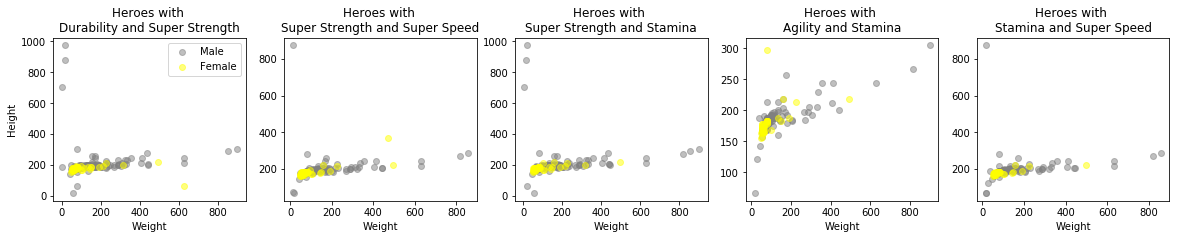

In [124]:
#Is there a relationship between a hero's height and weight and their powerset?
#create 5 scatter plots - 1 for each of top 5 powerset in total, and color by gender

#init figure
fig = plt.figure(figsize=(20,3))

#create 10 axes
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)


#set the powers for each scatterplot
ax1_powers = ['Durability','Super Strength']
ax2_powers = ['Super Strength', 'Super Speed']
ax3_powers = ['Super Strength','Stamina']
ax4_powers = ['Agility','Stamina']
ax5_powers = ['Stamina','Super Speed']
ax6_powers = ax1_powers
ax7_powers = ax2_powers
ax8_powers = ax3_powers
ax9_powers = ax4_powers
ax10_powers = ax5_powers

#make x and y series for each plot
ax1_data = heroes_and_powers[(heroes_and_powers[ax1_powers[0]]==True) 
                              & (heroes_and_powers[ax1_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Male')]
ax2_data = heroes_and_powers[(heroes_and_powers[ax2_powers[0]]==True) 
                              & (heroes_and_powers[ax2_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Male')]
ax3_data = heroes_and_powers[(heroes_and_powers[ax3_powers[0]]==True) 
                              & (heroes_and_powers[ax3_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Male')]
ax4_data = heroes_and_powers[(heroes_and_powers[ax4_powers[0]]==True) 
                              & (heroes_and_powers[ax4_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Male')]
ax5_data = heroes_and_powers[(heroes_and_powers[ax5_powers[0]]==True) 
                              & (heroes_and_powers[ax5_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Male')]
ax6_data = heroes_and_powers[(heroes_and_powers[ax6_powers[0]]==True) 
                              & (heroes_and_powers[ax6_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Female')]
ax7_data = heroes_and_powers[(heroes_and_powers[ax7_powers[0]]==True) 
                              & (heroes_and_powers[ax7_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Female')]
ax8_data = heroes_and_powers[(heroes_and_powers[ax8_powers[0]]==True) 
                              & (heroes_and_powers[ax8_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Female')]
ax9_data = heroes_and_powers[(heroes_and_powers[ax9_powers[0]]==True) 
                              & (heroes_and_powers[ax9_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Female')]
ax10_data = heroes_and_powers[(heroes_and_powers[ax10_powers[0]]==True) 
                              & (heroes_and_powers[ax10_powers[1]]==True)
                              & (heroes_and_powers['Gender']=='Female')]

#plot each scatter plot. Colors need to be factorized
ax1.scatter(ax1_data['Weight'], ax1_data['Height'], label='Male', c='grey', alpha = 0.5)
ax1.scatter(ax6_data['Weight'], ax6_data['Height'], label='Female', c='yellow', alpha = 0.5)
ax2.scatter(ax2_data['Weight'], ax2_data['Height'], label='Male', c='grey', alpha = 0.5)
ax2.scatter(ax7_data['Weight'], ax7_data['Height'], label='Female', c='yellow', alpha = 0.5)
ax3.scatter(ax3_data['Weight'], ax3_data['Height'], label='Male', c='grey', alpha = 0.5)
ax3.scatter(ax8_data['Weight'], ax8_data['Height'], label='Female', c='yellow', alpha = 0.5)
ax4.scatter(ax4_data['Weight'], ax4_data['Height'], label='Male', c='grey', alpha = 0.5)
ax4.scatter(ax9_data['Weight'], ax9_data['Height'], label='Female', c='yellow', alpha = 0.5)
ax5.scatter(ax5_data['Weight'], ax5_data['Height'], label='Male', c='grey', alpha = 0.5)
ax5.scatter(ax10_data['Weight'], ax10_data['Height'], label='Female', c='yellow', alpha = 0.5)

#titles
ax1.set_title(f'Heroes with \n{ax1_powers[0]} and {ax1_powers[1]}')
ax2.set_title(f'Heroes with \n{ax2_powers[0]} and {ax2_powers[1]}')
ax3.set_title(f'Heroes with \n{ax3_powers[0]} and {ax3_powers[1]}')
ax4.set_title(f'Heroes with \n{ax4_powers[0]} and {ax4_powers[1]}')
ax5.set_title(f'Heroes with \n{ax5_powers[0]} and {ax5_powers[1]}')

#set axes labels
ax1.set_xlabel('Weight')
ax1.set_ylabel('Height') #only need one height label
ax2.set_xlabel('Weight')
ax3.set_xlabel('Weight')
ax4.set_xlabel('Weight')
ax5.set_xlabel('Weight')

ax1.legend()
plt.show()

In this analysis, we can see that Heroes with Agility and Stamina are increase their height as weight rises *faster* than any of the other groups. This makes sense because agility is usually associated with weighing less.

In [125]:
#Which publishers do the top 3 heroes with the most powers belong to?
#sum the powers for each heros using lambda function
heroes_and_powers['num_powers'] 

ValueError: cannot reindex from a duplicate axis

In [ ]:
#Is there a relationship between height, weight, across genders and publishers?

In [ ]:
#What is each publisher's favourite power?

In [88]:
#Is there a difference in powers between good and bad heroes?

In [ ]:
#What powers do the neutral heroes have?

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data